In [10]:
#importing libaries
import pandas as pd


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("iris-data.csv")

In [5]:
data.head(20)
data.shape

(150, 5)

In [6]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118cd87b8>,
      dtype=object)

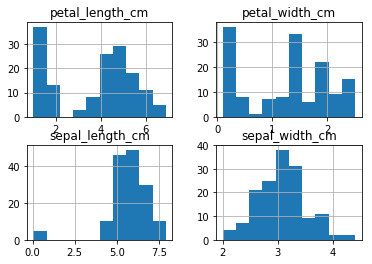

In [11]:
data.hist()
#sepal length seems to have an outlier

In [22]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.083176,0.831878,0.781243
sepal_width_cm,-0.083176,1.000000,-0.419796,-0.348464
petal_length_cm,0.831878,-0.419796,1.000000,0.958934
petal_width_cm,0.781243,-0.348464,0.958934,1.000000


In [13]:
data.sort_values(by=["sepal_length_cm"])
#has 5 really small values
#values in other columns look normal
#its also all rows from (77-81)so directly followed, so might be data entry mistake
#or lazy data manipulation :)  sincei dont know anything about the collection proces
#I will replace them with the 25 percentile
data["sepal_length_cm"]=np.where(data["sepal_length_cm"]<1,5.1,data["sepal_length_cm"])


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,5.7,3.0,1.1,0.1,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa


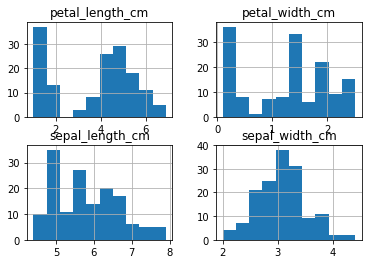

In [17]:
data.hist()
data.sort_values(by=["petal_length_cm"])
data.sort_values(by=["petal_width_cm"])

In [32]:
#checking for nans
null = data[data.isna().any(axis=1)]
null
#5 missing values all in petal width
#rows 7-11
#all are iris setosa so i will replace it with the mean of that class
data.groupby("class").mean()
data=data.fillna(0.25)

In [33]:
null = data[data.isna().any(axis=1)]
null

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1194603c8>,
      dtype=object)

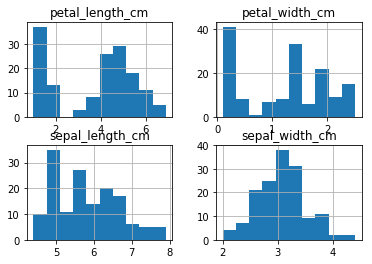

In [34]:
data.hist()
#petal length and width still have a lot of small values
#but looks like it could be "normal"

In [39]:
data["class"].value_counts()
data["class"]=np.where(data["class"]=="versicolor","Iris-versicolor",data["class"])
data["class"]=np.where(data["class"]=="Iris-setossa","Iris-setosa",data["class"])

In [40]:
data["class"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [37]:
#1. I took care of Nans
#2. When data was outside the expected range i changed it
#3 Took care of wrongly encoded data

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64